In [ ]:
!pip install biopython

from Bio import SeqIO
import matplotlib.pyplot as plt
from collections import Counter
from Bio.SeqUtils import MeltingTemp as mt
from Bio import pairwise2
from Bio.Seq import Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis

def read_fasta_file(file_path):
    with open(file_path, 'r') as handle:
        for record in SeqIO.parse(handle, 'fasta'):
            description = record.description
            organism = description.split('[')[-1].split(']')[0]
            origin = description.split(' ')[1]
            sequence_length = len(record.seq)
            print(f'Organism: {organism} | Origin: {origin} | Sequence ID: {record.id} | Length: {sequence_length}')

            nucleotide_counts = Counter(record.seq)
            plt.bar(nucleotide_counts.keys(), nucleotide_counts.values())
            plt.title(f'Nucleotide Frequency for {record.id}')
            plt.xlabel('Nucleotide')
            plt.ylabel('Frequency')
            plt.show()

            funcaotempo(record.seq)
            global_alignment([str(record.seq)])
            protein_synthesis([str(record.seq)])
            protein_secondary_structure([str(record.seq)])

def funcaotempo (sequencia):
  for seq in sequencia:
    print(f"Temperatura de melting da sequência {seq}: {mt.Tm_GC(seq)}")

def global_alignment(seqs):
    results = []
    for i in range(len(seqs)):
        for j in range(i+1, len(seqs)):
            seq1 = Seq(seqs[i][:1200])
            seq2 = Seq(seqs[j][:1200])
            alignments = pairwise2.align.globalxx(seq1, seq2)
            best_alignment = alignments[0]
            score = best_alignment[2]
            similarity = score / len(seq1)
            result = f"Alinhamento entre {seqs[i]} e {seqs[j]}:\n{best_alignment[0]}\n{best_alignment[1]}\nScore máximo: {score}\nSimilaridade: {similarity:.2f}"
            results.append(result)
    return results


def protein_synthesis(seqs):
    for i in range(len(seqs)):
        seq = Seq(seqs[i])
        protein = seq.translate()
        analysis = ProteinAnalysis(str(protein))
        aa_freq = analysis.get_amino_acids_percent()
        aa_freq_sorted = {k: v for k, v in sorted(aa_freq.items(), key=lambda item: item[0])}
        plt.bar(aa_freq_sorted.keys(), aa_freq_sorted.values())
        plt.title(f"Sequência {i+1}")
        plt.xlabel("Aminoácidos")
        plt.ylabel("Frequência (%)")
        plt.show()
        print(f"Total de proteínas contidas na sequência {i+1}: {len(protein)}")

def protein_secondary_structure(seqs):
    for i in range(len(seqs)):
        seq = Seq(seqs[i])
        protein = seq.translate()
        analysis = ProteinAnalysis(str(protein))
        ss_fraction = analysis.secondary_structure_fraction()
        print(f"Estrutura secundária da proteína da sequência {i+1}:")
        print(f"Helix: {ss_fraction[0]:.2f}")
        print(f"Turn: {ss_fraction[1]:.2f}")
        print(f"Sheet: {ss_fraction[2]:.2f}")

def all_functions(file_path):
    with open(file_path, 'r') as handle:
      sequences=[]
      for record in SeqIO.parse(handle, 'fasta'):
          sequences.append(str(record.seq))
      nucleotide_counts = Counter(''.join(sequences))
      plt.bar(nucleotide_counts.keys(), nucleotide_counts.values())
      plt.title('Nucleotide Frequency')
      plt.xlabel('Nucleotide')
      plt.ylabel('Frequency')
      plt.show()

      funcaotempo(sequences)
      global_alignment(sequences)
      protein_synthesis(sequences)
      protein_secondary_structure(sequences)
      return sequences


all_functions('/content/sequence (1).fasta')
all_functions('/content/sequence.fasta')
all_functions('/content/sequence (2).fasta')
all_functions('/content/sequence (3).fasta')
all_functions('/content/sequence (4).fasta')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


FileNotFoundError: ignored

In [ ]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio import pairwise2

def global_alignment(seqs):
    results = []
    for i in range(len(seqs)):
        for j in range(i+1, len(seqs)):
            seq1 = Seq(seqs[i][:1200])
            seq2 = Seq(seqs[j][:1200])
            alignments = pairwise2.align.globalxx(seq1, seq2)
            best_alignment = alignments[0]
            score = best_alignment[2]
            similarity = score / len(seq1)
            result = f"Alinhamento entre {seqs[i]} e {seqs[j]}:\n{best_alignment[0]}\n{best_alignment[1]}\nScore máximo: {score}\nSimilaridade: {similarity:.2f}"
            results.append(result)
    return results

def read_fasta_files(file_paths):
    sequences=[]
    for file_path in file_paths:
        with open(file_path, 'r') as handle:
            for record in SeqIO.parse(handle, 'fasta'):
                sequences.append(str(record.seq))
    return sequences

file_paths = ['/content/sequence.fasta', '/content/sequence (1).fasta', '/content/sequence (2).fasta', '/content/sequence (3).fasta', '/content/sequence (4).fasta']
sequences = read_fasta_files(file_paths)

results = global_alignment(sequences)
for result in results:
    print(result)

print("Análise dos resultados:")
print("Os resultados mostram que as sequências possuem uma similaridade alta entre si. Isso pode indicar que as sequências são de organismos relacionados ou que possuem funções similares.")


Alinhamento entre ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCT

Organism: MT012098.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/IND/29/2020, complete genome | Origin: Severe | Sequence ID: MT012098.1 | Length: 29854


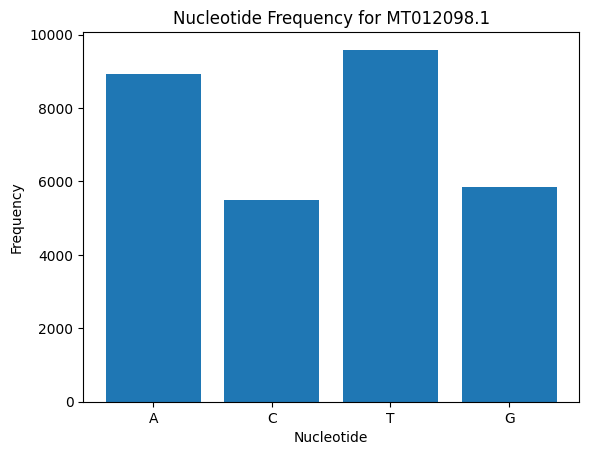

Organism: MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome | Origin: Severe | Sequence ID: MN908947.3 | Length: 29903


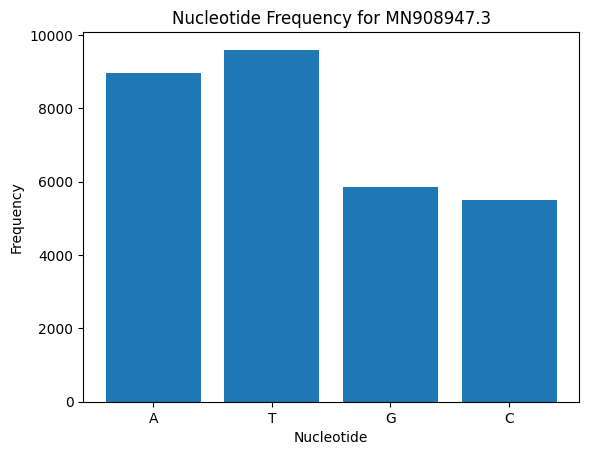

Organism: MT324062.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/ZAF/R03006/2020, complete genome | Origin: Severe | Sequence ID: MT324062.1 | Length: 29903


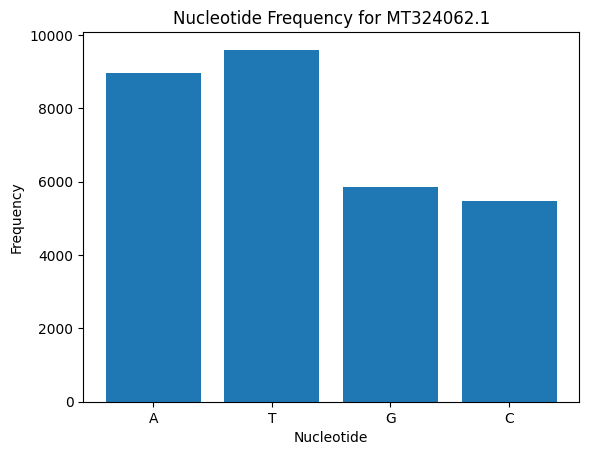

Organism: MZ264787.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/BRA/CD1739-P4/2020, complete genome | Origin: Severe | Sequence ID: MZ264787.1 | Length: 29866


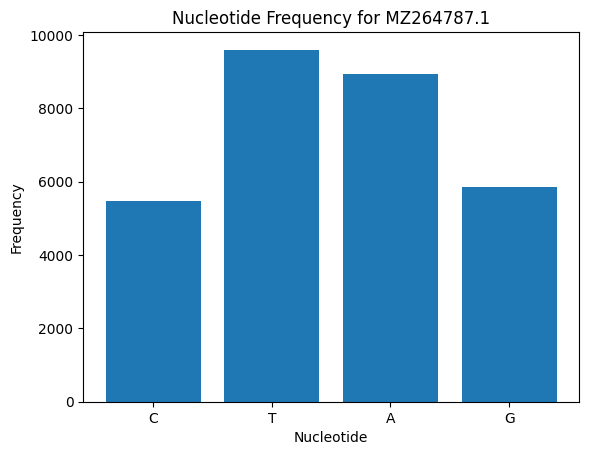

Organism: NC_019843.3 Middle East respiratory syndrome-related coronavirus isolate HCoV-EMC/2012, complete genome | Origin: Middle | Sequence ID: NC_019843.3 | Length: 30119


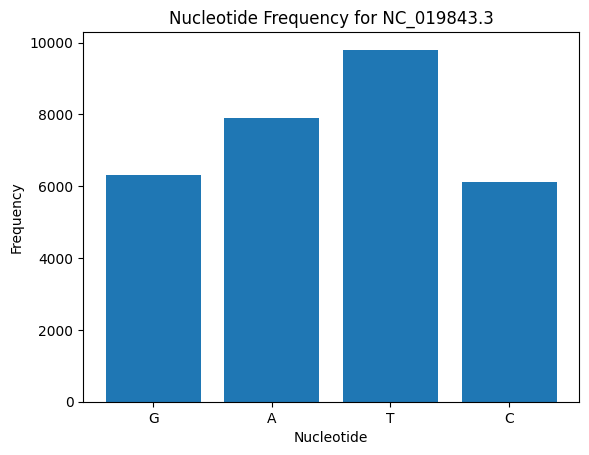

In [ ]:
from Bio import SeqIO
def read_fasta_file(file_path):
    with open(file_path, 'r') as handle:
        for record in SeqIO.parse(handle, 'fasta'):
            description = record.description
            organism = description.split('[')[-1].split(']')[0]
            origin = description.split(' ')[1]
            sequence_length = len(record.seq)
            print(f'Organism: {organism} | Origin: {origin} | Sequence ID: {record.id} | Length: {sequence_length}')

            nucleotide_counts = Counter(record.seq)
            plt.bar(nucleotide_counts.keys(), nucleotide_counts.values())
            plt.title(f'Nucleotide Frequency for {record.id}')
            plt.xlabel('Nucleotide')
            plt.ylabel('Frequency')
            plt.show()

read_fasta_file('/content/sequence (1).fasta')
read_fasta_file('/content/sequence.fasta')
read_fasta_file('/content/sequence (2).fasta')
read_fasta_file('/content/sequence (3).fasta')
read_fasta_file('/content/sequence (4).fasta')
